In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../first_exo/concrete_strength_dataset.csv")

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [6]:
# split into input (X) and output (y) variables
X = df.drop(['Strength'],axis=1)
y = df["Strength"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# import pickle

# # pickle.dump(X_train, open("data/X_test.sav", 'wb')
# pickle.dump(y_test, open("data/y_test.sav", 'wb'))

In [9]:
# N'est pas très utile pour notre problématique

# from sklearn.preprocessing import StandardScaler

# # define standard scaler
# scaler = StandardScaler()
# # transform data
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# print(X_train)

In [10]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))

In [11]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [105]:
...
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
...

Ellipsis

In [23]:
print(df[0:6:])

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   
5   266.0               114.0      0.0  228.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  
5             932.0           670.0   90     47.03  


In [24]:
from keras.callbacks import EarlyStopping

stp = EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=0,
        verbose=1,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
)

In [102]:
X_test.shape

(340, 8)

In [106]:
...
# fit the keras model on the dataset
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=500, batch_size=32,shuffle=True)
...
# ,validation_split=0.33,callbacks=EarlyStopping(monitor='val_loss')

Epoch 1/500
22/22 [==============================] - 1s 10ms/step - loss: 8453.7754 - mae: 80.7480 - val_loss: 771.7342 - val_mae: 23.1287
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 737.7786 - mae: 21.5150 - val_loss: 633.6874 - val_mae: 19.3465
Epoch 3/500
22/22 [==============================] - 0s 4ms/step - loss: 545.9357 - mae: 18.8579 - val_loss: 453.1366 - val_mae: 17.3585
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 465.0005 - mae: 17.7111 - val_loss: 405.5822 - val_mae: 16.2153
Epoch 5/500
22/22 [==============================] - 0s 4ms/step - loss: 424.6086 - mae: 16.7718 - val_loss: 368.1985 - val_mae: 15.3821
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 376.8581 - mae: 15.8328 - val_loss: 329.9752 - val_mae: 14.5702
Epoch 7/500
22/22 [==============================] - 0s 3ms/step - loss: 338.5607 - mae: 14.9155 - val_loss: 307.1418 - val_mae: 14.0194
Epoch 8/500
22/22 [====================

Ellipsis

In [26]:
import matplotlib.pyplot as plt

print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


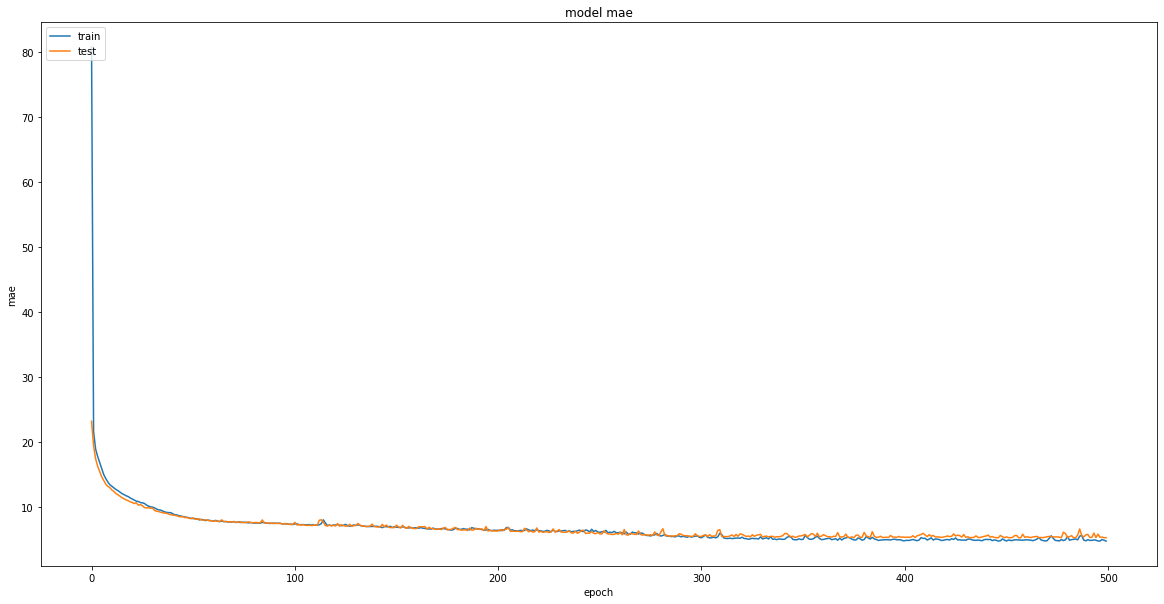

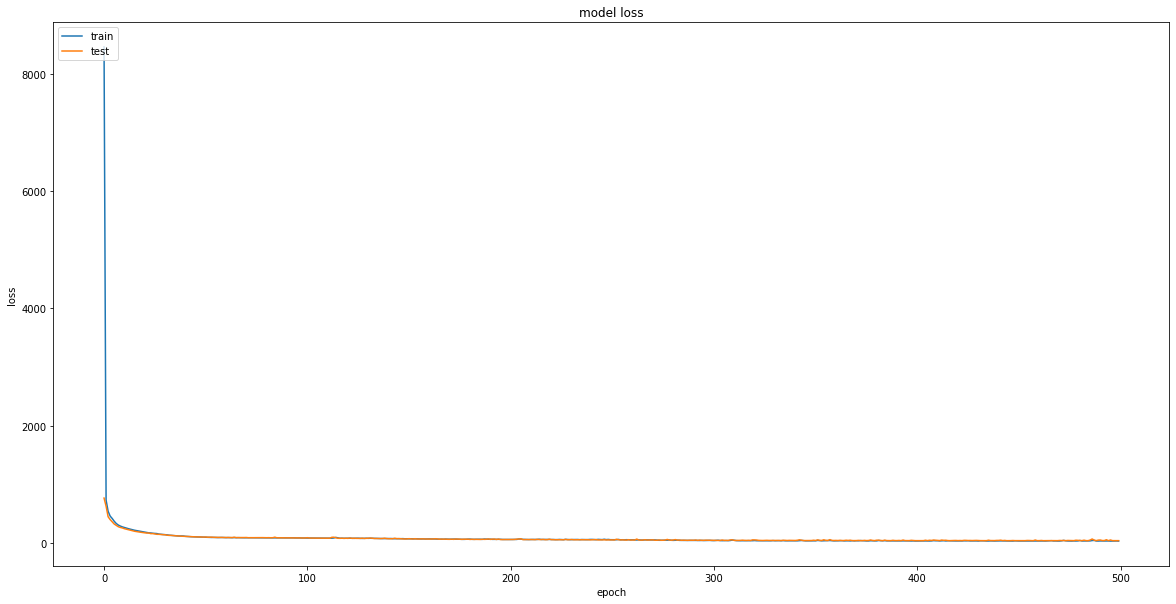

In [107]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [31]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

-2.674704743969101


In [ ]:
print(model.predict(X_test))

[[44.364788 ]
 [47.130672 ]
 [69.54855  ]
 [44.12872  ]
 [18.04114  ]
 [42.3961   ]
 [31.38112  ]
 [51.600517 ]
 [34.799442 ]
 [47.822514 ]
 [35.394485 ]
 [15.456403 ]
 [49.23711  ]
 [46.949924 ]
 [23.317919 ]
 [30.521122 ]
 [36.83962  ]
 [20.490934 ]
 [37.66959  ]
 [28.08992  ]
 [39.51943  ]
 [38.094303 ]
 [48.760365 ]
 [15.298097 ]
 [30.483723 ]
 [38.50586  ]
 [12.783589 ]
 [43.704723 ]
 [49.23082  ]
 [16.86264  ]
 [43.091633 ]
 [44.14369  ]
 [56.19221  ]
 [54.586864 ]
 [20.917257 ]
 [36.58807  ]
 [34.433445 ]
 [42.086285 ]
 [12.995332 ]
 [55.949257 ]
 [18.65091  ]
 [ 7.1820836]
 [40.25633  ]
 [53.92697  ]
 [11.937911 ]
 [70.8472   ]
 [51.662674 ]
 [46.748775 ]
 [29.208818 ]
 [10.833547 ]
 [51.95847  ]
 [45.33019  ]
 [29.48231  ]
 [23.047617 ]
 [54.647392 ]
 [44.070118 ]
 [25.68528  ]
 [14.652322 ]
 [44.4411   ]
 [28.287994 ]
 [41.91955  ]
 [18.534145 ]
 [40.639294 ]
 [49.90642  ]
 [29.302496 ]
 [19.258522 ]
 [36.184307 ]
 [19.48045  ]
 [41.94082  ]
 [23.756159 ]
 [12.544848 ]
 [25.6

In [32]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

-2.674704743969101


In [ ]:
model.save('data/model.h5')

In [34]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [16]:
def Model():
    # define the keras model
    modo = Sequential()
    modo.add(Dense(12, input_dim=8, activation='relu'))
    modo.add(Dense(8, activation='relu'))
    modo.add(Dense(6, activation='relu'))
    modo.add(Dense(1))
    # compile the keras model
    # model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return modo

In [36]:
# pip install scikeras --user
clf = KerasRegressor(model=Model, batch_size=32,loss='mean_squared_error', epochs=600,optimizer='adam', metrics=['mae'], shuffle=True,
                           validation_split=0.3)

In [37]:
pipe = Pipeline([
    ('rescale', preprocessing.StandardScaler()),
    ('nn', clf)
])


pipe.fit(X_train, y_train)

Epoch 1/600
16/16 [==============================] - 1s 20ms/step - loss: 1617.3390 - mean_absolute_error: 36.3592 - val_loss: 1476.6830 - val_mean_absolute_error: 35.2616
Epoch 2/600
16/16 [==============================] - 0s 6ms/step - loss: 1601.0525 - mean_absolute_error: 36.1553 - val_loss: 1458.5840 - val_mean_absolute_error: 35.0185
Epoch 3/600
16/16 [==============================] - 0s 6ms/step - loss: 1578.7710 - mean_absolute_error: 35.8710 - val_loss: 1433.5354 - val_mean_absolute_error: 34.6791
Epoch 4/600
16/16 [==============================] - 0s 6ms/step - loss: 1547.4124 - mean_absolute_error: 35.4712 - val_loss: 1398.7325 - val_mean_absolute_error: 34.1989
Epoch 5/600
16/16 [==============================] - 0s 6ms/step - loss: 1505.6536 - mean_absolute_error: 34.9253 - val_loss: 1353.2882 - val_mean_absolute_error: 33.5602
Epoch 6/600
16/16 [==============================] - 0s 7ms/step - loss: 1449.5686 - mean_absolute_error: 34.1841 - val_loss: 1295.0066 - val_me

Pipeline(steps=[('rescale', StandardScaler()),
                ('nn',
                 KerasRegressor(batch_size=32, epochs=600, loss='mean_squared_error', metrics=['mae'], model=<function Model at 0x000002763DB83D30>, optimizer='adam', validation_split=0.3))])

In [38]:
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

22/22 [==============================] - 0s 1ms/step
Training set score: 0.871783133618486
11/11 [==============================] - 0s 2ms/step
Test set score: 0.8498410692974373


In [39]:
hist = clf.history_.keys()
print(hist)

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


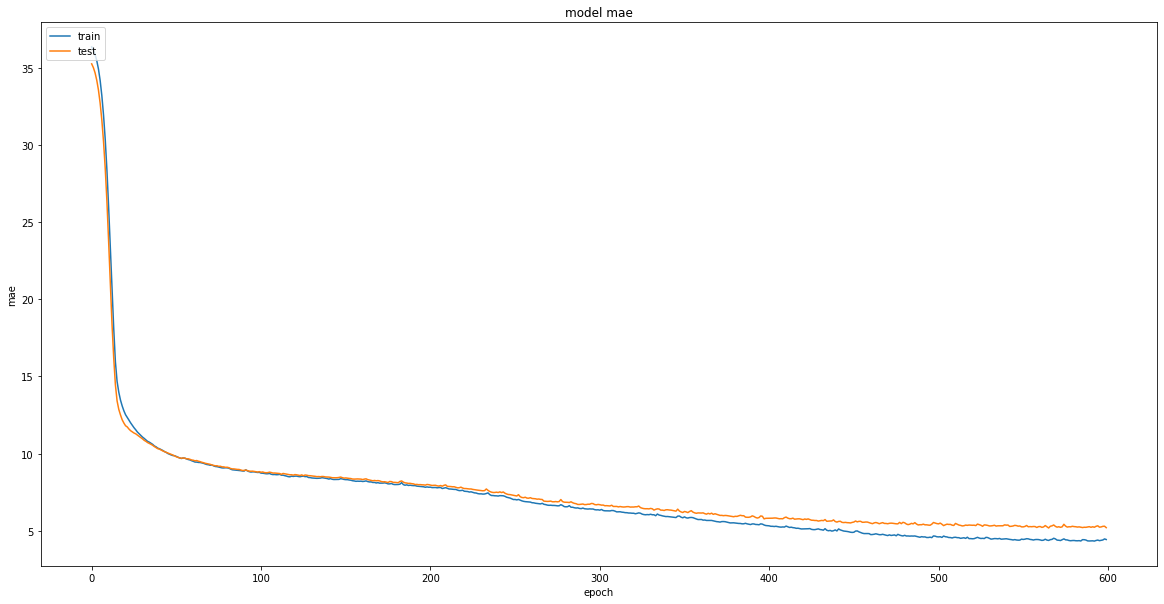

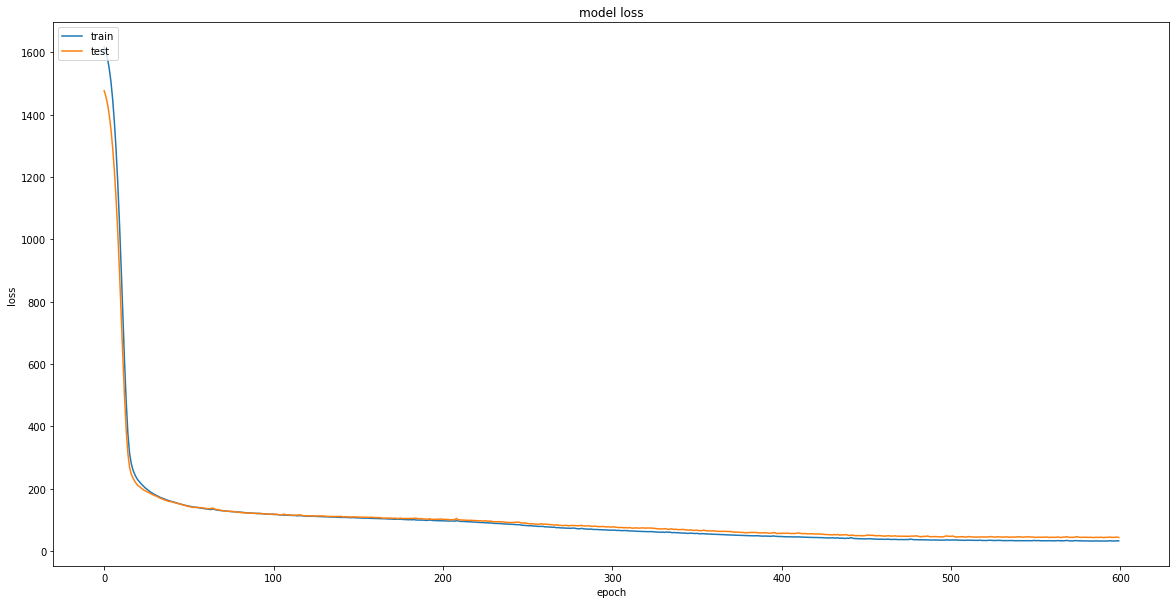

In [44]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(clf.history_['mean_absolute_error'])
plt.plot(clf.history_['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(clf.history_['loss'])
plt.plot(clf.history_['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# print(f"Trained {len(pipe.history_['loss'])} epochs")
# print(f"Final accuracy: {pipe.history_['val_binary_accuracy'][-1]}")  # get last value of last fit/partial_fit call

In [45]:
# pip install scikeras --user
clf_rms_prop = KerasRegressor(model=Model, batch_size=32,loss='mean_squared_error', epochs=600,optimizer='rmsprop', metrics=['mae'], shuffle=True,
                           validation_split=0.3)
pipe_rms_prop = Pipeline([
    ('rescale', preprocessing.StandardScaler()),
    ('nn', clf_rms_prop)
])


pipe_rms_prop.fit(X_train, y_train)

Epoch 1/600
16/16 [==============================] - 1s 11ms/step - loss: 1596.7966 - mean_absolute_error: 36.0783 - val_loss: 1453.8254 - val_mean_absolute_error: 34.9473
Epoch 2/600
16/16 [==============================] - 0s 3ms/step - loss: 1573.7463 - mean_absolute_error: 35.7694 - val_loss: 1433.2821 - val_mean_absolute_error: 34.6668
Epoch 3/600
16/16 [==============================] - 0s 4ms/step - loss: 1548.6090 - mean_absolute_error: 35.4425 - val_loss: 1405.9585 - val_mean_absolute_error: 34.2935
Epoch 4/600
16/16 [==============================] - 0s 4ms/step - loss: 1517.6095 - mean_absolute_error: 35.0344 - val_loss: 1374.5443 - val_mean_absolute_error: 33.8597
Epoch 5/600
16/16 [==============================] - 0s 5ms/step - loss: 1482.4530 - mean_absolute_error: 34.5586 - val_loss: 1338.8167 - val_mean_absolute_error: 33.3554
Epoch 6/600
16/16 [==============================] - 0s 4ms/step - loss: 1443.0110 - mean_absolute_error: 34.0147 - val_loss: 1298.6953 - val_me

Pipeline(steps=[('rescale', StandardScaler()),
                ('nn',
                 KerasRegressor(batch_size=32, epochs=600, loss='mean_squared_error', metrics=['mae'], model=<function Model at 0x000002763DB83D30>, validation_split=0.3))])

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


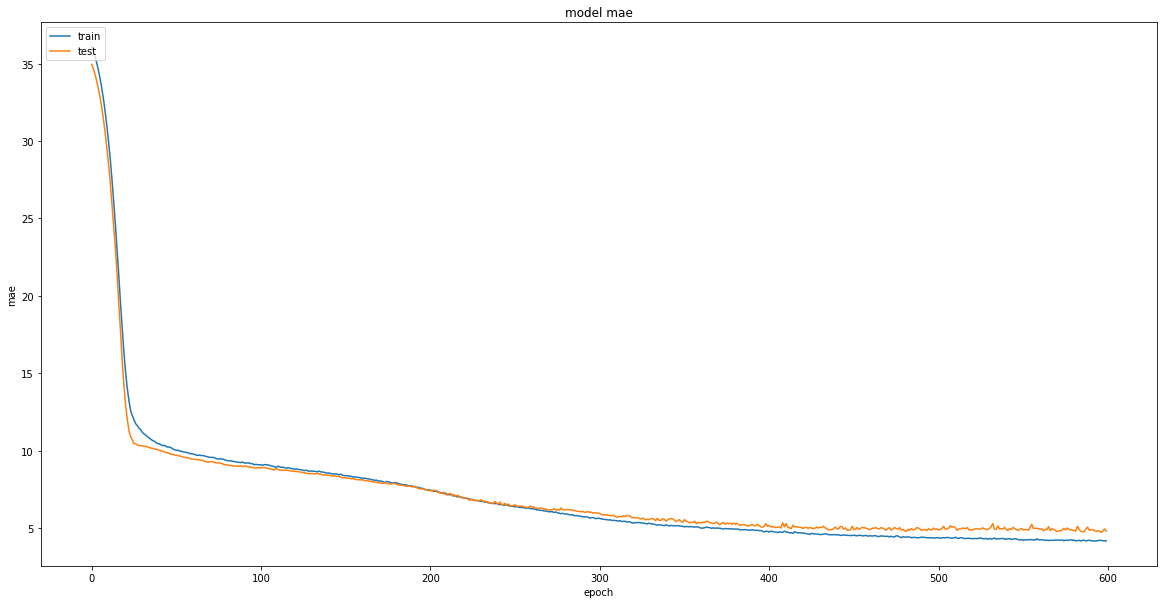

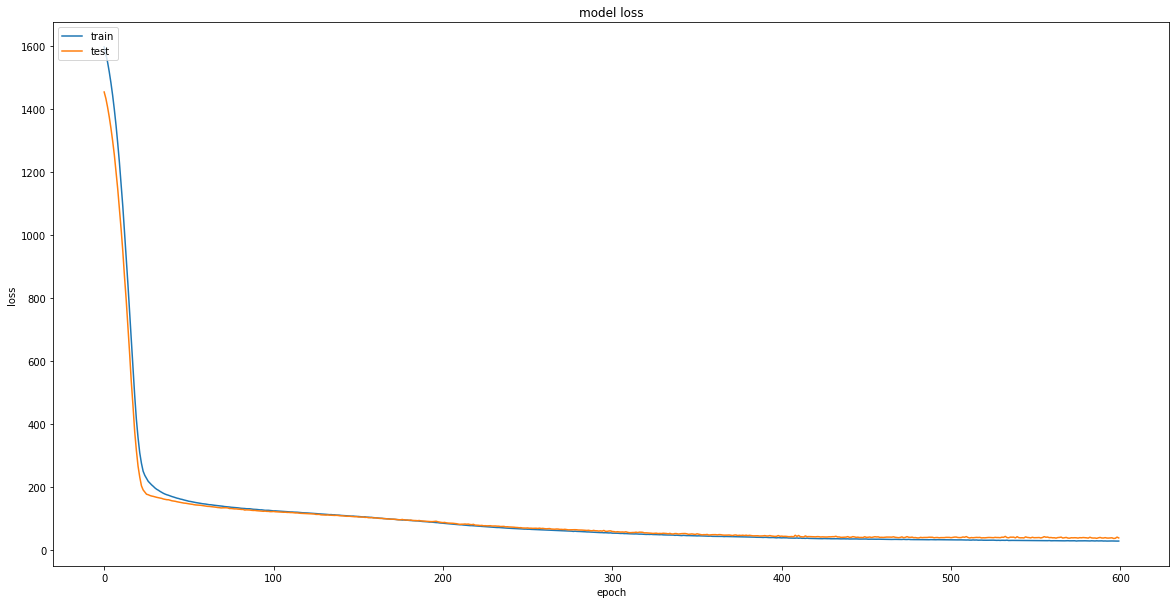

In [46]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(clf_rms_prop.history_['mean_absolute_error'])
plt.plot(clf_rms_prop.history_['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(clf_rms_prop.history_['loss'])
plt.plot(clf_rms_prop.history_['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
print('Training set score: ' + str(pipe_rms_prop.score(X_train,y_train)))
print('Test set score: ' + str(pipe_rms_prop.score(X_test,y_test)))

22/22 [==============================] - 0s 765us/step
Training set score: 0.8826092042692382
11/11 [==============================] - 0s 1ms/step
Test set score: 0.8488311408285585


In [49]:
def Model_with_new_acrhitecture():
    # define the keras model
    modo = Sequential()
    modo.add(Dense(64, input_dim=8, activation='relu'))
    modo.add(Dense(64, activation='relu'))
    modo.add(Dense(1))
    # compile the keras model
    # model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return modo

In [50]:
# pip install scikeras --user
clf_rms_prop_new_model_architecture = KerasRegressor(model=Model, batch_size=32,loss='mean_squared_error', epochs=600,optimizer='rmsprop', metrics=['mae'], shuffle=True,
                           validation_split=0.3)
pipe_rms_prop_new_model_architecture = Pipeline([
    ('rescale', preprocessing.StandardScaler()),
    ('nn', clf_rms_prop_new_model_architecture)
])


pipe_rms_prop_new_model_architecture.fit(X_train, y_train)

Epoch 1/600
16/16 [==============================] - 1s 15ms/step - loss: 1669.5630 - mean_absolute_error: 37.0386 - val_loss: 1521.0880 - val_mean_absolute_error: 35.8676
Epoch 2/600
16/16 [==============================] - 0s 5ms/step - loss: 1652.2050 - mean_absolute_error: 36.8058 - val_loss: 1510.1151 - val_mean_absolute_error: 35.7123
Epoch 3/600
16/16 [==============================] - 0s 4ms/step - loss: 1641.6053 - mean_absolute_error: 36.6615 - val_loss: 1502.6271 - val_mean_absolute_error: 35.6034
Epoch 4/600
16/16 [==============================] - 0s 4ms/step - loss: 1633.8086 - mean_absolute_error: 36.5558 - val_loss: 1496.3162 - val_mean_absolute_error: 35.5133
Epoch 5/600
16/16 [==============================] - 0s 5ms/step - loss: 1627.6431 - mean_absolute_error: 36.4697 - val_loss: 1490.9067 - val_mean_absolute_error: 35.4347
Epoch 6/600
16/16 [==============================] - 0s 5ms/step - loss: 1621.9958 - mean_absolute_error: 36.3881 - val_loss: 1485.7166 - val_me

Pipeline(steps=[('rescale', StandardScaler()),
                ('nn',
                 KerasRegressor(batch_size=32, epochs=600, loss='mean_squared_error', metrics=['mae'], model=<function Model at 0x000002763DB83D30>, validation_split=0.3))])

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


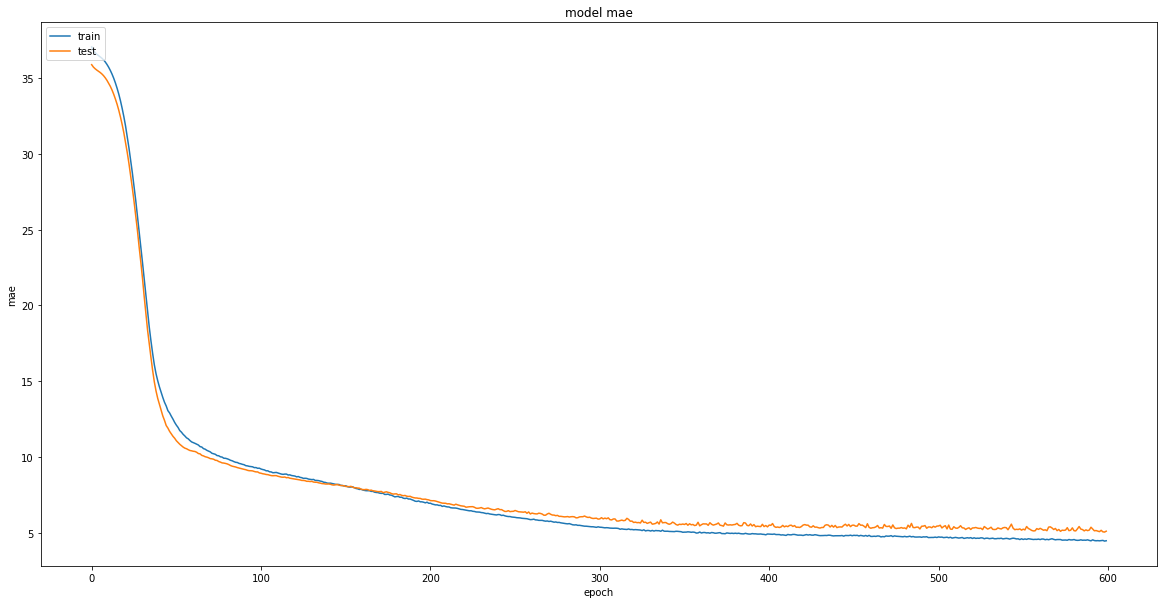

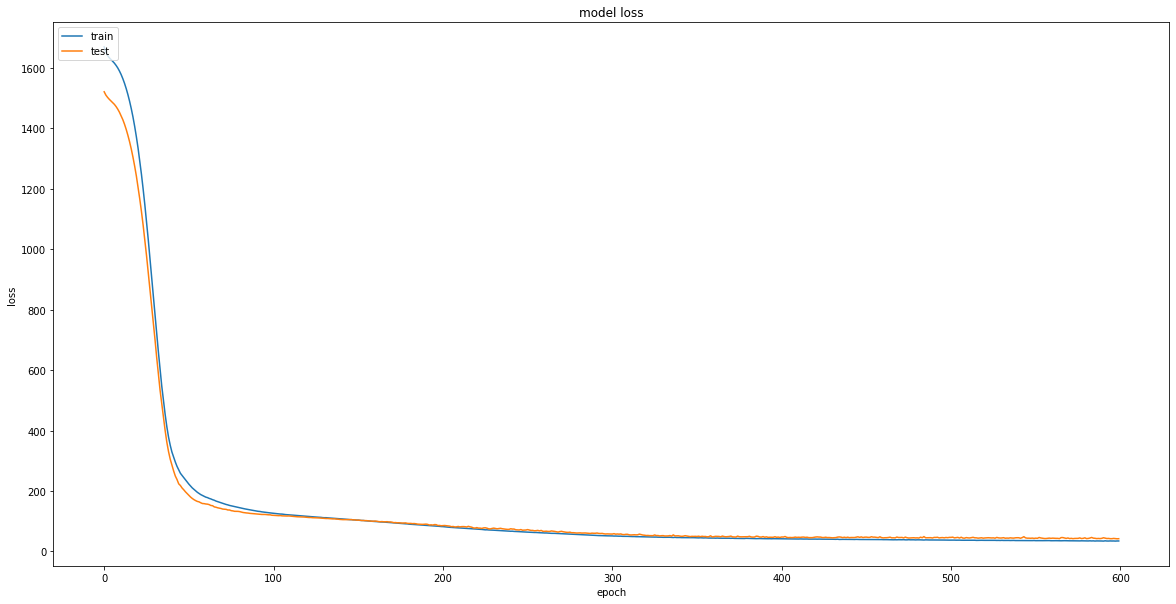

In [51]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(clf_rms_prop_new_model_architecture.history_['mean_absolute_error'])
plt.plot(clf_rms_prop_new_model_architecture.history_['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(clf_rms_prop_new_model_architecture.history_['loss'])
plt.plot(clf_rms_prop_new_model_architecture.history_['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [91]:
# pip install scikeras --user
clf_rms_prop_new_model_architecture_X = KerasRegressor(model=Model, batch_size=32,loss='mean_squared_error', epochs=100,optimizer='rmsprop', metrics=['mae'], shuffle=True,
                           validation_split=0.3)
pipe_rms_prop_new_model_architecture_X = Pipeline([
    ('rescale', preprocessing.StandardScaler()),
    ('nn', clf_rms_prop_new_model_architecture_X)
])


pipe_rms_prop_new_model_architecture_X.fit(X, y)

TypeError: Model() got an unexpected keyword argument 'validation_data'

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


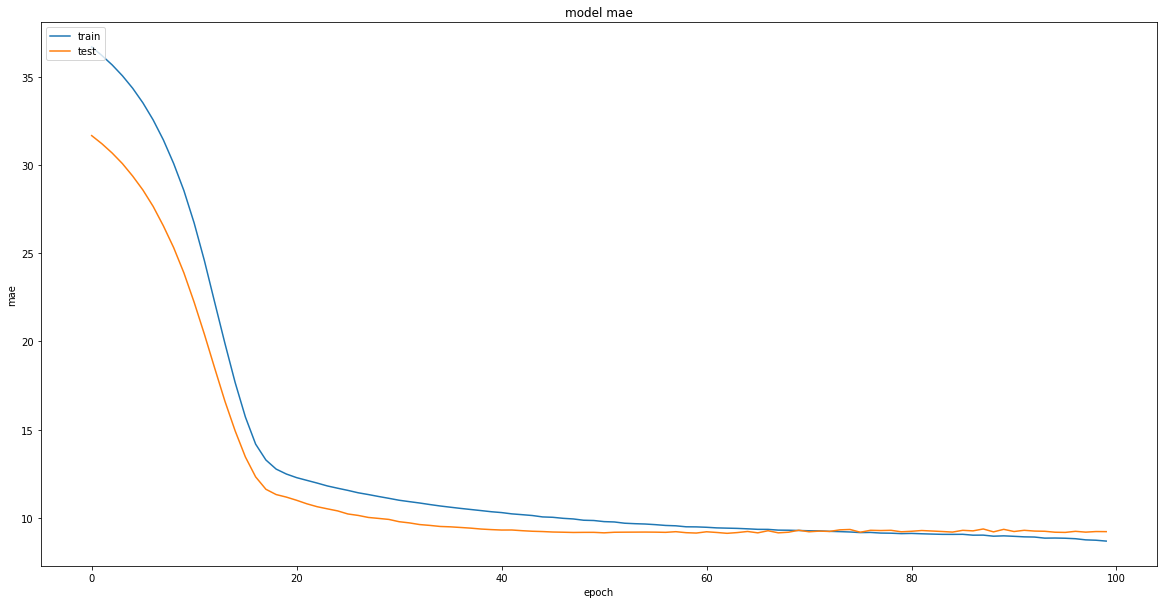

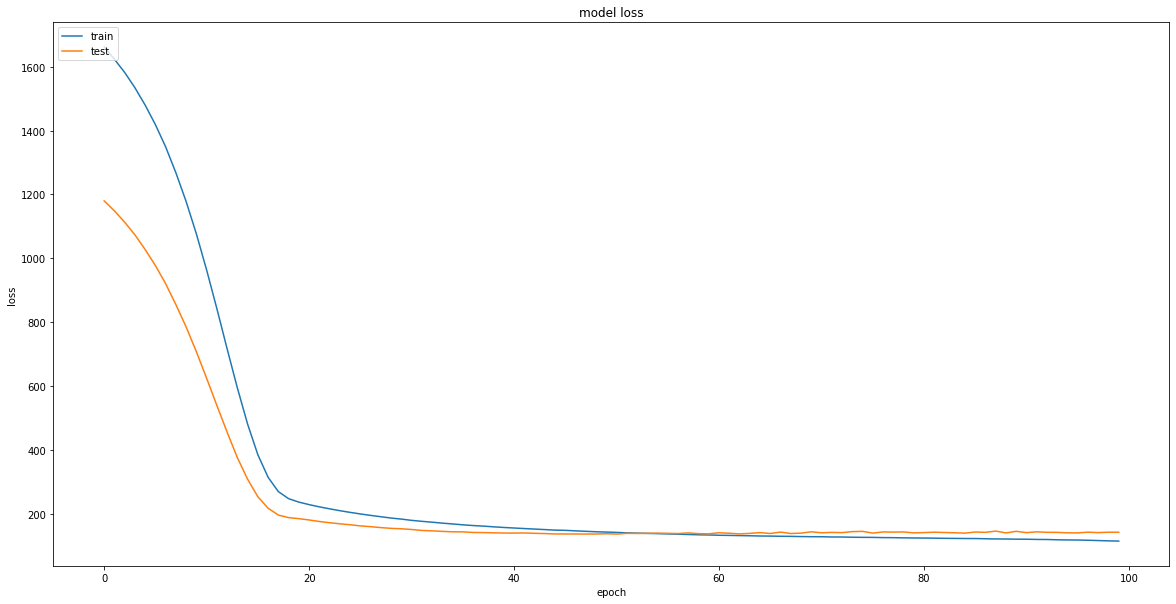

In [59]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(clf_rms_prop_new_model_architecture_X.history_['mean_absolute_error'])
plt.plot(clf_rms_prop_new_model_architecture_X.history_['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(clf_rms_prop_new_model_architecture_X.history_['loss'])
plt.plot(clf_rms_prop_new_model_architecture_X.history_['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print()

(1030, 8)
(1030,)
(690, 8)
(340, 8)



In [12]:
import numpy as np
train_data = X_train
train_targets = y_train


In [71]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = Model()
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])

    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [72]:
print(all_scores)

[6.722332000732422, 6.8960371017456055, 6.27403450012207, 7.181309700012207]


In [15]:
k = 4
num_epochs = 500
num_val_samples = len(train_data) // k
all_mae_histories = []
all_val_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = Model()
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
    val_mae_history = history.history["val_mae"]
    mae_history = history.history['mae']
    all_val_mae_histories.append(val_mae_history)
    all_mae_histories.append(mae_history)

Processing fold #0


NameError: name 'Model' is not defined

In [80]:
all_mae_histories

[[134.984619140625,
  73.20819091796875,
  31.210102081298828,
  15.681910514831543,
  14.586080551147461,
  14.5827054977417,
  14.38052749633789,
  14.249991416931152,
  14.186513900756836,
  14.158617973327637,
  14.518464088439941,
  13.911673545837402,
  14.042349815368652,
  13.681464195251465,
  13.629690170288086,
  13.519033432006836,
  14.050232887268066,
  13.403937339782715,
  13.320873260498047,
  13.229798316955566,
  13.070760726928711,
  13.090076446533203,
  13.012242317199707,
  13.122997283935547,
  12.898358345031738,
  13.071300506591797,
  12.76108455657959,
  12.721330642700195,
  12.591378211975098,
  12.586688041687012,
  12.529730796813965,
  12.488901138305664,
  12.589786529541016,
  12.273178100585938,
  12.249981880187988,
  12.314982414245605,
  12.393525123596191,
  12.135241508483887,
  12.23074722290039,
  11.938455581665039,
  12.302592277526855,
  11.921104431152344,
  11.694687843322754,
  11.62603759765625,
  11.582873344421387,
  11.63365268707275

In [82]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

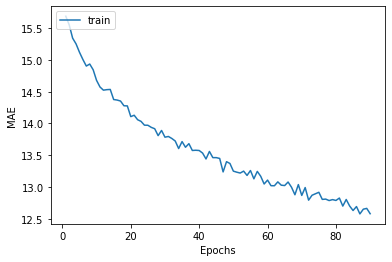

In [110]:
truncated_val_mae_history = average_val_mae_history[10:]
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
# plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(clf_rms_prop_new_model_architecture_X.history_['mean_absolute_error'])
plt.plot(clf_rms_prop_new_model_architecture_X.history_['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(clf_rms_prop_new_model_architecture_X.history_['loss'])
plt.plot(clf_rms_prop_new_model_architecture_X.history_['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()